In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from cifar.CIFAR10Utils import *

## Using Keras Data augument tool ImageDataGenerator,
Choose Image randomly,show them,and using imageGen to see what the new
look like

In [ ]:
def load_dataset(flaten=False,one_hot=True):
    def _make_one_hot(d,C=10):
        return (np.arange(C)==d[:,None]).astype(np.int32)
    X_train,Y_train,X_test,Y_test=load_CIFAR10(os.path.join(os.getcwd(),'cifar/CIFAR10_DATA'))

    X_train=X_train/255
    X_test=X_test/255
    # mean_image = np.mean(X_train, axis=0)
    # std_image=np.std(X_train,axis=0)
    # X_train =(X_train-mean_image)/std_image
    # X_test = (X_test-mean_image)/std_image

    if flaten:
        X_train=X_train.reshape((-1,32*32*3))
        X_test = X_test.reshape((-1,32*32*3))
    if one_hot:
        Y_train=_make_one_hot(Y_train)
        Y_test = _make_one_hot(Y_test)
    classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    print('\n-------------------------------------------------------------------------')
    print('load %d train Example,%d Test Example'%(X_train.shape[0],X_test.shape[0]))
    print('Train Images  Shape:'+str(X_train.shape))
    print('Train Labels  Shape:' + str(Y_train.shape))
    print('Test  Images  Shape:'+str(X_test.shape))
    print('Test  Labels  Shape:' + str(Y_test.shape))
    print('-------------------------------------------------------------------------')
    return X_train,Y_train,X_test,Y_test,classes

In [ ]:
X_train,Y_train,X_test,Y_test,classes=load_dataset()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize']=(20,20)
% %matplotlib inline

In [ ]:
def imshow(X,Y=None,classes=None):
    '''
        X is a numpy array,size (m,h,w,c)
        Y is a numpy array,size (m,#classes)
    '''
    m=X.shape[0]
    gridSize=int(m**0.5)
    for i in range(0,gridSize):
        for j in range(0,gridSize):
            _idx=i*gridSize+j
            im=X[_idx]
            plt.subplot(gridSize,gridSize,_idx+1)
            plt.axis('off')
            plt.imshow(im)
            if Y is not None:
                label=classes[np.argmax(Y[_idx])]
                plt.title(label)

In [ ]:
seed=0
np.random.seed(seed)
m=X_train.shape[0]
idxes=np.arange(m)
np.random.shuffle(idxes)
top=9
X,Y=X_train[:top],Y_train[:top]
imshow(X,Y,classes)

In [ ]:
#define a augument object
#width_shift_range mean point x in orgin pic change transforn to [x-width_shift_range*w,x+width_shift_range*w]
aug=ImageDataGenerator(horizontal_flip=False,width_shift_range=0.125,height_shift_range=0.125,
                       samplewise_center=False,samplewise_std_normalization=False,featurewise_center=False,
                      featurewise_std_normalization=False)
aug.fit(X)
gen=aug.flow(batch_size=9,x=X_train,y=Y_train,shuffle=True,seed=0)

for i in range(1):
    _x,_y=gen[0]
    for img in _x:print('mean of image %i is %f,std is %f'%(i,np.mean(img),np.std(img)))
    plt.figure()
    imshow(_x,_y,classes)

## another problem is using LeNet slide over to read numbers
first lets load mnist dataset

In [1]:
from mnist.MnistUtils import *
plt.rcParams['image.cmap']='gray'
import matplotlib.pyplot as plt
import numpy as np
import h5py
plt.rcParams['figure.figsize']=(20,20)
% %matplotlib inline

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
X_train,Y_train,X_test,Y_test=load_dataset(one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


 MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz

-------------------------------------------------------------------------
load 55000 train Example,10000 Test Example
Train Images  Shape:(55000, 28, 28, 1)
Train Labels  Shape:(55000, 10)
Test  Images  Shape:(10000, 28, 28, 1)
Test  Labels  Shape:(10000, 10)
-------------------------------------------------------------------------


In [3]:
seed=0
np.random.seed(seed)
m=X_train.shape[0]
idxes=np.arange(m)
np.random.shuffle(idxes)
top=9
X,Y=X_train[:top],Y_train[:top]
imshow(np.squeeze(X))


NameError: name 'imshow' is not defined

In [4]:
'''
    return a picture of digits size: H,W*n,1
'''
def digits(X,Y,Ty=64,maxNum=10):
    '''
        generate a image contain maxNum's characters,some char may
        be blank(labeled as 11) for seq2seq model
        
        X:standard mnist db,shape [?,28,28,1]
        Y:standard mnist db,shape [?,10]
        Ty:sequence length of output
        Tx:sequence length of input,28 x maxNum
        
        return retX:[28,28xmaxNum,1]
               retY:[Ty], 11 classes
    '''
    m,h,w,c=X.shape
    Tx=maxNum*w
    #a help function convert input steps to output steps
    def _convert(s,e):
        ret_s,ret_y=int(s*Ty/Tx),int(e*Ty/Tx)
        return ret_s,ret_y
    n=np.random.randint(3,maxNum+1) # at least 3 digits
    
    #
    #random choose maxNum image from Sample X,then set last maxNum-n to blank 
    idxes=np.arange(m)
    np.random.shuffle(idxes)
    selectIndex=idxes[:maxNum]  #the index of random chioce
    selectX=X[selectIndex]#shape [maxNum,28,28,1]
    selectX[n:]=0
    #using fancy thick, convert to a list with item shape[28,28,1],so concate along axis=1
    retX=np.concatenate(list(selectX),axis=1)  #shape [28,28xmaxNum,1]
    
    #handle ret_Y
    Y=np.argmax(Y,axis=1) #shape [m,]
    selectY=Y[selectIndex] #shape[maxNum,]

    retY=np.zeros(Ty)+11 #initial to all black
    WS=7 #window size
    for i in range(n):
        s,e=w*i+WS,w*i+w-WS
        s,e=_convert(s,e)
        retY[s:e]=selectY[i]
        
    return retX,retY

[ 11.   5.   5.   5.  11.  11.  11.  11.   6.   6.   6.  11.  11.  11.   6.
   6.   6.  11.  11.  11.   6.   6.   6.   6.  11.  11.  11.   9.   9.   9.
  11.  11.  11.   1.   1.   1.  11.  11.  11.  11.  11.  11.  11.  11.  11.
  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11.
  11.  11.  11.  11.]


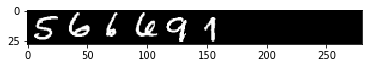

In [9]:
X,Y=digits(X_train,Y_train,Ty=64,maxNum=10)
print(Y)
plt.imshow(np.squeeze(X))

In [19]:
def mnistSeqDB(filename,sX,sY,dbSize=55000,maxNum=10,Ty=64,seed=None):
    '''
        sX,sY come from mnist db (m,28,28,1),(m,10)
    '''
    
    np.random.seed(seed)
    Xs,Ys=[],[]
    for k in range(dbSize):
        X,Y=digits(sX,sY,maxNum=maxNum,Ty=Ty)
        Xs.append(X)
        Ys.append(Y)
        if k%5000==0:print('%d/%d'%(k,dbSize))
    Xs=np.array(Xs)
    Ys=np.array(Ys)
    hf =h5py.File(filename,'w')
    hf.create_dataset('X', data=Xs)
    hf.create_dataset('Y', data=Ys)
    hf.close()

In [24]:
filename='mnistSeq55k.h5'
mnistSeqDB(filename,X_train,Y_train,dbSize=55000,maxNum=10,Ty=64)

0/55000
5000/55000
10000/55000
15000/55000
20000/55000
25000/55000
30000/55000
35000/55000
40000/55000
45000/55000
50000/55000


In [27]:
#load Data
hf=h5py.File(filename,'r')
X,Y=np.array(hf.get('X')),np.array(hf.get('Y'))
hf.close()

[ 11.   4.   4.   4.  11.  11.  11.  11.   8.   8.   8.  11.  11.  11.   4.
   4.   4.  11.  11.  11.   5.   5.   5.   5.  11.  11.  11.   1.   1.   1.
  11.  11.  11.   1.   1.   1.  11.  11.  11.  11.   5.   5.   5.  11.  11.
  11.   1.   1.   1.  11.  11.  11.   3.   3.   3.   3.  11.  11.  11.  11.
  11.  11.  11.  11.]


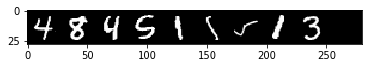

In [29]:
idx=10
x,y=X[idx],Y[idx]
print(y)
plt.imshow(np.squeeze(x))

In [ ]:
from keras.layers import  Input,Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential,Model
import tensorflow as tf
import keras.backend as K
import numpy as np
from keras.initializers import he_normal,glorot_normal
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [ ]:
def LeNet():    
    model=Sequential([
        Conv2D(filters=5,strides=1,kernel_size=5,padding='SAME',
             kernel_initializer='he_normal',activation='relu',input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(filters=16,strides=1,kernel_size=5,padding='SAME',
               kernel_initializer='he_normal',activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(filters=120,strides=1,kernel_size=7,padding='VALID',
               kernel_initializer='he_normal',activation='relu'),
        Conv2D(filters=84,strides=1,kernel_size=1,padding='VALID',
               kernel_initializer='he_normal',activation='relu'),
        Conv2D(filters=10,strides=1,kernel_size=1,padding='VALID',
               kernel_initializer='he_normal',activation='softmax'),
        Flatten()
    ])
    model.summary()
    return model
model=LeNet()

In [ ]:
batchSize=128
model.compile(optimizer=Adam(0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
augment=ImageDataGenerator(horizontal_flip=True,height_shift_range=0.025,width_shift_range=0.025)
gen=augment.flow(X_train,Y_train,batchSize)
# model.fit_generator(generator=gen,epochs=20,shuffle=True,validation_data=(X_test,Y_test))
model.fit(X_train,Y_train,batch_size=128,epochs=20,shuffle=True,validation_data=(X_test,Y_test))

In [ ]:
idx=np.arange(50,58)

print(np.argmax(model.predict(X_test[idx,:]),axis=-1))
print(np.max(model.predict(20+0.7*X_test[idx,:]),axis=-1))
print(np.argmax(Y_test[idx],axis=-1))
# print(np.argmax(Y_test[idx]))

In [ ]:
model.predict(np.random.rand(1,30,30,1))